# Sample code for Question 1

This notebook shows how you can use the provided Python function to pull player stats from an online website.
This function lives in a custom package that is provided to you in this repository.
You are encouraged to leverage this package as a skeleton and add all of your reusable code, functions, etc. into relevant modules.
This makes collaboration much easier as the package could be seen as a "single source of truth" to pull data, create visualizations, etc. rather than relying on a jumble of notebooks.
You can still run into trouble if branches are not frequently merged as work progresses, so try to not let your branches diverge too much.

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/IFT6758/ift6758-project-template-main"
os.chdir(path)

Mounted at /content/drive


In [3]:
from ift6758.data import get_player_stats

If the above doesn't work for you, make sure you've installed the repo as specified in the readme file. 
Essentially you must make sure that your environment is setup (either through conda or virtualenv), and then install it using:

```bash
pip install -e /path/to/repo 
```

The nice thing using this approach is if you have your environment activated, you can import modules from anywhere on your system!

In [4]:
df = get_player_stats(2018, 'goalies')

Retrieving data from 'https://www.hockey-reference.com/leagues/NHL_2018_goalies.html'...


If you're curious, this function uses the `pd.read_html()` method ([doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html)), which internally uses [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to parse HTML data.

In [5]:
df.head()

,Rk,Player,Age,Tm,GP,GS,W,L,T/O,GA,SA,SV,SV%,GAA,SO,GPS,MIN,QS,QS%,RBS,GA%-,GSAA,G,A,PTS,PIM
0,1,Jake Allen,27,STL,59,56,27,25,3,152,1614,1462,.906,2.75,1,7.9,3317,27,.482,8,107,-10.34,0,1,1,0
1,2,Frederik Andersen,28,TOR,66,66,38,21,5,182,2211,2029,.918,2.81,5,13.6,3889,37,.561,8,94,12.06,0,1,1,2
2,3,Craig Anderson,36,OTT,58,55,23,25,6,180,1768,1588,.898,3.32,2,7.2,3251,25,.455,11,116,-24.83,0,0,0,2
3,4,Kenneth Appleby,22,NJD,3,1,0,1,0,3,55,52,.945,1.45,0,0.5,124,0,.000,0,NaN,NaN,0,0,0,0
4,5,Jonathan Bernier,29,COL,37,34,19,13,3,95,1092,997,.913,2.85,2,6.2,2001,18,.529,5,99,0.84,0,1,1,0


### 1. Warm-up(10%)
Question 1

In [6]:
df = get_player_stats(2018, 'goalies')
df.sort_values(by="SV%" , ascending=False)[0:5]

Retrieving data from 'https://www.hockey-reference.com/leagues/NHL_2018_goalies.html'...


,Rk,Player,Age,Tm,GP,GS,W,L,T/O,GA,SA,SV,SV%,GAA,SO,GPS,MIN,QS,QS%,RBS,GA%-,GSAA,G,A,PTS,PIM
27,29,Scott Foster,36,CHI,1,0,0,0,0,0,7,7,1.000,0.00,0,0.1,14,0,NaN,0,NaN,NaN,0,0,0,0
88,95,Adam Wilcox,25,BUF,1,0,0,1,0,0,14,14,1.000,0.00,0,0.2,39,0,NaN,0,NaN,NaN,0,0,0,0
51,55,Marek Langhamer,23,ARI,1,0,0,0,0,0,10,10,1.000,0.00,0,0.2,29,0,NaN,0,NaN,NaN,0,0,0,0
16,17,Oscar Dansk,23,VEG,4,3,3,0,0,5,93,88,.946,1.78,1,0.9,169,3,1.000,0,NaN,NaN,0,0,0,0
3,4,Kenneth Appleby,22,NJD,3,1,0,1,0,3,55,52,.945,1.45,0,0.5,124,0,.000,0,NaN,NaN,0,0,0,0


Question 2

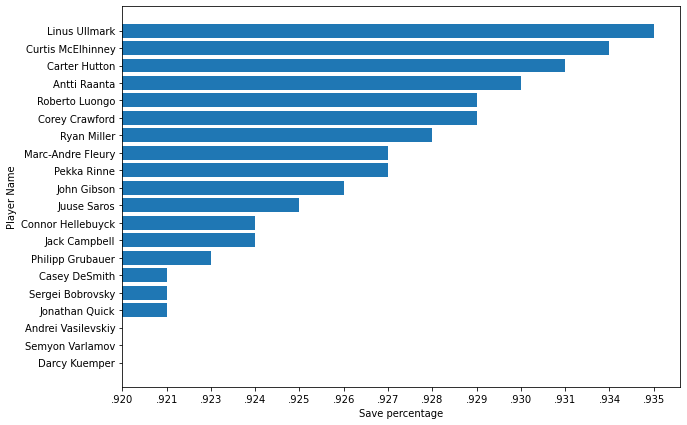

In [11]:
from matplotlib import pyplot as plt

df = df[df['SA'].astype(int) > 100]
df_sort = df.sort_values(by=['SV%'], ascending=False).head(20)
df_plot = df_sort.sort_values(by=['SV%'])
x = df_plot['Player'].head(20)
y = df_plot['SV%'].head(20)
fig = plt.figure(figsize =(10, 7))
plt.barh(x, y)
plt.ylabel('Player Name', fontsize = 10)
plt.xlabel('Save percentage', fontsize = 10)
plt.show()

### 2. Data Acquisition

In [12]:
import requests
import time
import random

def download(gameID):
  path = "/content/drive/MyDrive/IFT6758/ift6758-project-template-main/data"
  if not os.path.exists("/content/drive/MyDrive/IFT6758/ift6758-project-template-main/data"):
    os.mkdir(path)
  os.chdir(path) 
    
  http = 'https://statsapi.web.nhl.com/api/v1/game/' + str(gameID) + '/feed/live'
  r = requests.get(http)
  if (r.status_code == 200):
    fileName = str(gameID) + '.json'
  try:
    with open(fileName,'wb') as f:
      f.write(r.content)
      return True
  except Exception as e:
    return False

In [7]:
# regular season
def regular_season(year, games):
  count = 0
  y = str(year)
  for i in range(1,games+1):
    num = str(i)
    while(len(num) < 4):
      num = '0' + num
    gameID = y + '02' + num
    if(download(gameID)):
      count += 1
  print(y + ' regular season: ' + str(count) + ' games')

# playoffs
def playoffs(year):
  count = 0
  y = str(year)
  # i2 means the 2nd digit of final 4 digits. 
  for i2 in range(1,5):
    for i3 in range(1,10):
      for i4 in range(1,8):
        num = '0' + str(i2) + str(i3) + str(i4)
        gameID = y + '03' + num
        if(download(gameID)):
          count += 1
  print(y + ' playoffs: ' + str(count) + ' games')

In [9]:
#take long time (30 min)
for i in range(2016,2021):
  if i <= 2017:
    regular_season(i,1230)
    playoffs(i)
  else:
    regular_season(i,1271)
    playoffs(i)

2016 regular season: 1230 games
2016 playoffs: 102 games
2017 regular season: 1230 games
2017 playoffs: 105 games
2018 regular season: 1271 games
2018 playoffs: 105 games
2019 regular season: 1271 games
2019 playoffs: 105 games
2020 regular season: 868 games
2020 playoffs: 105 games


### **4. Tidy data**

In [ ]:
import pandas as pd
import json

def shooterANDgoalie(df):
  players = df['players'].tolist()
  shooter = []
  goalie = []
  for i in players:
    countS = 0
    countG = 0
    for j in i:
      if j['playerType'] == 'Shooter':
        countS +=1
        shooter.append(j['player']['fullName'])
      if j['playerType'] == 'Goalie':
        countG +=1
        goalie.append(j['player']['fullName'])
    if(countS == 0):
      shooter.append('NaN')
    if(countG == 0):
      goalie.append('NaN')
  df.insert(12, 'shooter', shooter)
  df.insert(13, 'goalie', goalie)
  return df

def jsonToDataframe(fileName):
  with open(fileName,'r') as f:
    data = json.loads(f.read())
  
  df= pd.json_normalize(data, ['liveData', 'plays', 'allPlays'], ['gamePk'], errors='ignore')

  # for some special files, eg 2016020785.json missing emptyNet, 2016030117.json missing a lot
  try:
    df = df = df[['about.periodTime', 'about.periodTimeRemaining', 'about.dateTime', 'about.period', 'about.eventId', 'gamePk', 'team.id', 'team.name', 'result.event', 'coordinates.x', 'coordinates.y', 'players', 'result.secondaryType', 'result.strength.name', 'result.emptyNet']]
    df = df[(df['result.event'] == 'Shot')|(df['result.event'] == 'Goal')]
    df.insert(5, 'season', data['gameData']['game']['season'])
    df.insert(9, 'home name', data['gameData']['teams']['home']['name'])
    df.insert(10, 'away name', data['gameData']['teams']['away']['name'])
    df.insert(11, 'rinkSide', data['liveData']['linescore']['periods']['num' == 1]['home']['rinkSide'])
    shooterANDgoalie(df)
  except(KeyError):
    if (('result.emptyNet' not in df) & ('about.periodTime' in df)):
      df = df = df[['about.periodTime', 'about.periodTimeRemaining', 'about.dateTime', 'about.period', 'about.eventId', 'gamePk', 'team.id', 'team.name', 'result.event', 'coordinates.x', 'coordinates.y', 'players', 'result.secondaryType', 'result.strength.name']]
      df['result.emptyNet'] = 'Nah'
      df = df[(df['result.event'] == 'Shot')|(df['result.event'] == 'Goal')]
      df.insert(5, 'season', data['gameData']['game']['season'])
      df.insert(9, 'home name', data['gameData']['teams']['home']['name'])
      df.insert(10, 'away name', data['gameData']['teams']['away']['name'])
      df.insert(11, 'rinkSide', data['liveData']['linescore']['periods']['num' == 1]['home']['rinkSide'])
      shooterANDgoalie(df)
    else: 
      df = pd.DataFrame(columns=['about.periodTime', 'about.periodTimeRemaining', 'about.dateTime', 'about.period', 'about.eventId', 'gamePk', 'season', 'team.id', 'team.name', 'result.event', 'coordinates.x', 'coordinates.y', 'players', 'shooter', 'goalie', 'result.secondaryType', 'result.strength.name', 'result.emptyNet'])
  df = df.drop(['players'],axis = 1)

  df = df.rename({'about.periodTime': 'period time', 'about.periodTimeRemaining': 'period time remaining', 'about.dateTime': 'date time', 'about.period': 'period num', 'about.eventId': 'event Id', 'gamePk': 'game ID', 'team.id': 'team ID', 'team.name': 'team name', 'result.event': 'shot or goal', 'coordinates.x': 'coordinates x', 'coordinates.y': 'coordinates y',  'result.secondaryType': 'shot type', 'result.strength.name': 'strength', 'result.emptyNet': 'empty net'},
                      axis='columns')
  return df

In [ ]:
datas.to_json('../alldatas.json')
datas.to_csv('../alldatas.csv')
#datas = data.reset_index()
#datas = datas.drop(['index'],axis = 1)
#datas = datas.drop(['players'],axis = 1)
datas.head(10)

In [7]:
def eachSeason():
  path = "/content/drive/MyDrive/IFT6758/ift6758-project-template-main/data"
  if not os.path.exists("/content/drive/MyDrive/IFT6758/ift6758-project-template-main/data"):
    os.mkdir(path)
  os.chdir(path)

  files= os.listdir(path)
  files.sort()

  df_all = pd.DataFrame(columns=['period time', 'period time remaining', 'date time', 
                             'period num', 'event Id', 'game ID', 'season', 'team ID', 'team name', 
                             'shot or goal', 'coordinates x', 'coordinates y', 'shooter', 'goalie', 
                             'shot type', 'strength', 'empty net'])

  for file in files[0:1230]: #2016R [0:1230], 2016P [1230:1332], 2017R [1332:2562], 2017P [2562:2667], 2018R [2667:3938], 2018P [3938:4043], 2019R [4043:5314], 2019P [5314:5419], 2020R [5419:6287] 2020P [6287:]
    df_all = pd.concat([df_all, jsonToDataframe(file)])
  df_all = df_all.reset_index() 
  df_all = df_all.drop(['index'],axis = 1)
  df_all['season'] = df_all['season'].apply(str)
  df_all['date time'] = pd.to_datetime(df_all["date time"], infer_datetime_format=True) 
  return df_all

data = eachSeason()
data.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,period time,period time remaining,date time,period num,event Id,game ID,season,team ID,team name,shot or goal,coordinates x,coordinates y,shooter,goalie,shot type,strength,empty net,home name,away name,rinkSide
0,01:11,18:49,2016-10-12 23:19:59,1,8,2016020001,20162017,10.0,Toronto Maple Leafs,Shot,-77.0,5.0,Mitchell Marner,Craig Anderson,Wrist Shot,NaN,NaN,Ottawa Senators,Toronto Maple Leafs,left
1,02:53,17:07,2016-10-12 23:21:41,1,11,2016020001,20162017,9.0,Ottawa Senators,Shot,86.0,13.0,Chris Kelly,Frederik Andersen,Wrist Shot,NaN,NaN,Ottawa Senators,Toronto Maple Leafs,left
2,04:01,15:59,2016-10-12 23:23:17,1,15,2016020001,20162017,9.0,Ottawa Senators,Shot,23.0,-38.0,Cody Ceci,Frederik Andersen,Wrist Shot,NaN,NaN,Ottawa Senators,Toronto Maple Leafs,left
3,04:46,15:14,2016-10-12 23:24:02,1,16,2016020001,20162017,9.0,Ottawa Senators,Shot,33.0,-15.0,Erik Karlsson,Frederik Andersen,Slap Shot,NaN,NaN,Ottawa Senators,Toronto Maple Leafs,left
4,06:46,13:14,2016-10-12 23:27:30,1,24,2016020001,20162017,10.0,Toronto Maple Leafs,Shot,-34.0,28.0,Martin Marincin,Craig Anderson,Wrist Shot,NaN,NaN,Ottawa Senators,Toronto Maple Leafs,left
5,07:30,12:30,2016-10-12 23:28:15,1,25,2016020001,20162017,10.0,Toronto Maple Leafs,Shot,-33.0,-17.0,Mitchell Marner,Craig Anderson,Wrist Shot,NaN,NaN,Ottawa Senators,Toronto Maple Leafs,left
6,08:21,11:39,2016-10-12 23:29:09,1,27,2016020001,20162017,10.0,Toronto Maple Leafs,Goal,-70.0,1.0,NaN,Craig Anderson,Wrist Shot,Even,False,Ottawa Senators,Toronto Maple Leafs,left
7,08:29,11:31,2016-10-12 23:30:02,1,29,2016020001,20162017,10.0,Toronto Maple Leafs,Shot,-45.0,-36.0,Matt Martin,Craig Anderson,Wrist Shot,NaN,NaN,Ottawa Senators,Toronto Maple Leafs,left
8,09:00,11:00,2016-10-12 23:32:48,1,31,2016020001,20162017,9.0,Ottawa Senators,Shot,33.0,-18.0,Erik Karlsson,Frederik Andersen,Slap Shot,NaN,NaN,Ottawa Senators,Toronto Maple Leafs,left
9,10:16,09:44,2016-10-12 23:35:27,1,36,2016020001,20162017,9.0,Ottawa Senators,Shot,34.0,20.0,Erik Karlsson,Frederik Andersen,Wrist Shot,NaN,NaN,Ottawa Senators,Toronto Maple Leafs,left


In [34]:
#data.to_csv('../2016R.csv')
#data.to_csv('../2016P.csv')
#data.to_csv('../2017R.csv')
#data.to_csv('../2017P.csv')
#data.to_csv('../2018R.csv')
#data.to_csv('../2018P.csv')
#data.to_csv('../2019R.csv')
#data.to_csv('../2019P.csv')
#data.to_csv('../2020R.csv')
#data.to_csv('../2020P.csv')